In [1]:
import sys
sys.path.append('/home/admin/developer/audio-gan-lib')
import torch
from gans import ProgressiveGAN
from utils.utils import load_model_checkp
from data.preprocessing import AudioProcessor
from data.loaders import NSynth
from pprint import pprint
from IPython.display import Audio
from utils.utils import ResizeWrapper

Cannot import Implicit Competitive Regularization package
No module named 'optims'


Setting up a new session...
Setting up a new session...


Caannot import MDCT


In [2]:
ls ../output_networks/drumgan/GANsynth_V0_nsynth_audioset/

ls: cannot access '../output_networks/drumgan/GANsynth_V0_nsynth_audioset/': No such file or directory


In [2]:
path_to_model = "/data/javier/experiments/stylegan/v0/stylegan_complex_v0"

In [441]:
# Best performing DarkGAN
# uses Specgrams / distillation from raw git repo (not panns-inference, although it's supposed to use same mdoel) / 
# len 2s / T=1
path_to_model = '../output_networks/drumgan/GANsynth_V0_nsynth_audioset'

In [2]:
path_to_model = '/home/javier/sandbox/GANsynth_V2_nsynth_audioset_all'

In [229]:
path_to_model = '/data/javier/experiments/audio-gan-lib-exps/darkgan/DarkGAN_T=5'

In [470]:
path_to_model = '/data/javier/experiments/audio-gan-lib-exps/darkgan/DarkGAN_T=1'

In [43]:
path_to_model = '/data/javier/experiments/audio-gan-lib-exps/darkgan/DarkGAN_T=10_specgrams'

In [198]:
path_to_model = '/data/javier/experiments/audio-gan-lib-exps/darkgan/DarkGAN_T=1_specgrams_128atts_no_asgm'

In [2]:
path_to_model = '/data/javier/experiments/audio-gan-lib-exps/darkgan/DarkGAN_T=1_specgrams_128atts_no_asgm_Cnn14_mAP=0.431.pth'

In [61]:
path_to_model = '/data/javier/experiments/audio-gan-lib-exps/darkgan/big_DarkGAN2_T=1_specgrams_128atts_Cnn14_mAP=0.431.pth'

In [ ]:
path_to_model = '/data/javier/experiments/audio-gan-lib-exps/darkgan/big_DarkGAN2_T=5_specgrams_128atts_Cnn14_mAP=0.431.pth'

In [3]:
path_to_model = '/data/javier/experiments/audio-gan-lib-exps/darkgan/big_DarkGAN2_T=10_specgrams_128atts_Cnn14_mAP=0.431.pth'

In [4]:
path_to_model = '/home/admin/developer/audio-gan-lib/output_networks/darkgan/darkGAN_T1_small'


# load model checkpoint

In [12]:
model, config, name = load_model_checkp(path_to_model, tocput=True)

Loading model darkGAN_T1_small, at iter None; scale None
1
PGAN: Building Generator

Size scale 0: [8, 8]

Checkpoint found at scale 5, iter 299994
1
PGAN: Building Generator

Size scale 0: (32, 4)

Average network found !


In [13]:
att_dict = model.ClassificationCriterion.inputDict
att_order = model.ClassificationCriterion.labelsOrder

In [14]:
len(att_dict['audioset']['values'])

128

## load pre-processor 

In [15]:
processor = AudioProcessor(**config['transform_config'])

Configuring specgrams transform...


In [16]:
config['loader_config']

{'dbname': 'nsynth',
 'data_path': '/home/admin/developer/data/NSYNTH/',
 'criteria': {'attributes': ['pitch', 'audioset'],
  'balance': ['pitch'],
  'filter': {'as_gm': False,
   'quantile_gm': True,
   'audioset': 128,
   'pitch': [44, 70]},
  'audioset': {'model': 'Cnn14_mAP=0.431.pth', 'temperature': 1}}}

## create loader

In [17]:
# config['loader_config']['criteria']['size'] = 1000

loader = NSynth(name= 'nsynth_' + config['transform_config']['transform'], 
                  preprocessing=processor, 
                  **config['loader_config'])

Extraction file /home/admin/developer/data/NSYNTH/extractions/8425cc286c7a3480821a4db99aee80067e928332/data.pt exists. Reloading.
Loading nsynth
Version: 0.0.0
Date: 21_03_20

Dataset /home/admin/developer/data/NSYNTH/processed/nsynth_specgrams/nsynth_specgrams_0xb1a4be4e6a4ddc9a492f70929b60bf2f9b1d4fe7.pt exists. Reloading...


In [18]:
val_audio, val_atts = loader.get_validation_set(10)
# val_atts = loader.get_random_labels(10)

tensor([[9.3273e-03, 1.5763e-04, 1.7058e-04,  ..., 2.0804e-03, 2.9970e-04,
         9.0000e+00],
        [9.2188e-04, 3.6373e-03, 1.8331e-03,  ..., 4.2999e-01, 1.4076e-04,
         1.4000e+01],
        [1.3794e-02, 9.0675e-04, 1.6415e-03,  ..., 4.9035e-04, 4.7880e-03,
         3.0000e+00],
        ...,
        [1.1936e-03, 3.0558e-03, 3.9935e-03,  ..., 7.0521e-02, 1.8543e-04,
         2.1000e+01],
        [6.3469e-03, 7.8500e-04, 8.2768e-04,  ..., 2.1301e-03, 1.9934e-04,
         1.7000e+01],
        [3.0624e-02, 6.0669e-04, 1.0296e-03,  ..., 1.5755e-04, 1.0444e-03,
         9.0000e+00]])

In [173]:
n = 0
resize = ResizeWrapper((1024, 64))

# pprint(loader.index_to_labels(val_atts[n:n+1]))
# pprint(att_dict['audioset']['values'])
# pprint(att_dict['pitch']['values'])
with torch.no_grad():
    gnet = model.netG.eval()
    input_t, atts = model.buildNoiseData(1, val_atts[n:n+1], skipAtts=True)
input_t2 = input_t.clone()


output = gnet(input_t).detach().cpu()[0].numpy()

audio_out = loader.get_postprocessor()(output)

# print(input_t2[0, -15:-3])

Audio(audio_out, rate=16000, autoplay=True)

In [71]:
loader.preprocessing.get_preprocessor()

Compose(
    functools.partial(<function loader at 0x7fe950215a60>, 16000, 16383)
    functools.partial(<function zeropad at 0x7fe950215bf8>, 16383)
    <function fade_out at 0x7fe950202a60>
    functools.partial(<function stft at 0x7fe950215ae8>, <data.preprocessing.AudioProcessor object at 0x7fe9500e6390>)
    <function mag_phase_angle at 0x7fe950202c80>
    <function safe_log_spec at 0x7fe950202e18>
    <function instantaneous_freq at 0x7fe9502159d8>
)

<IPython.core.display.Javascript object>


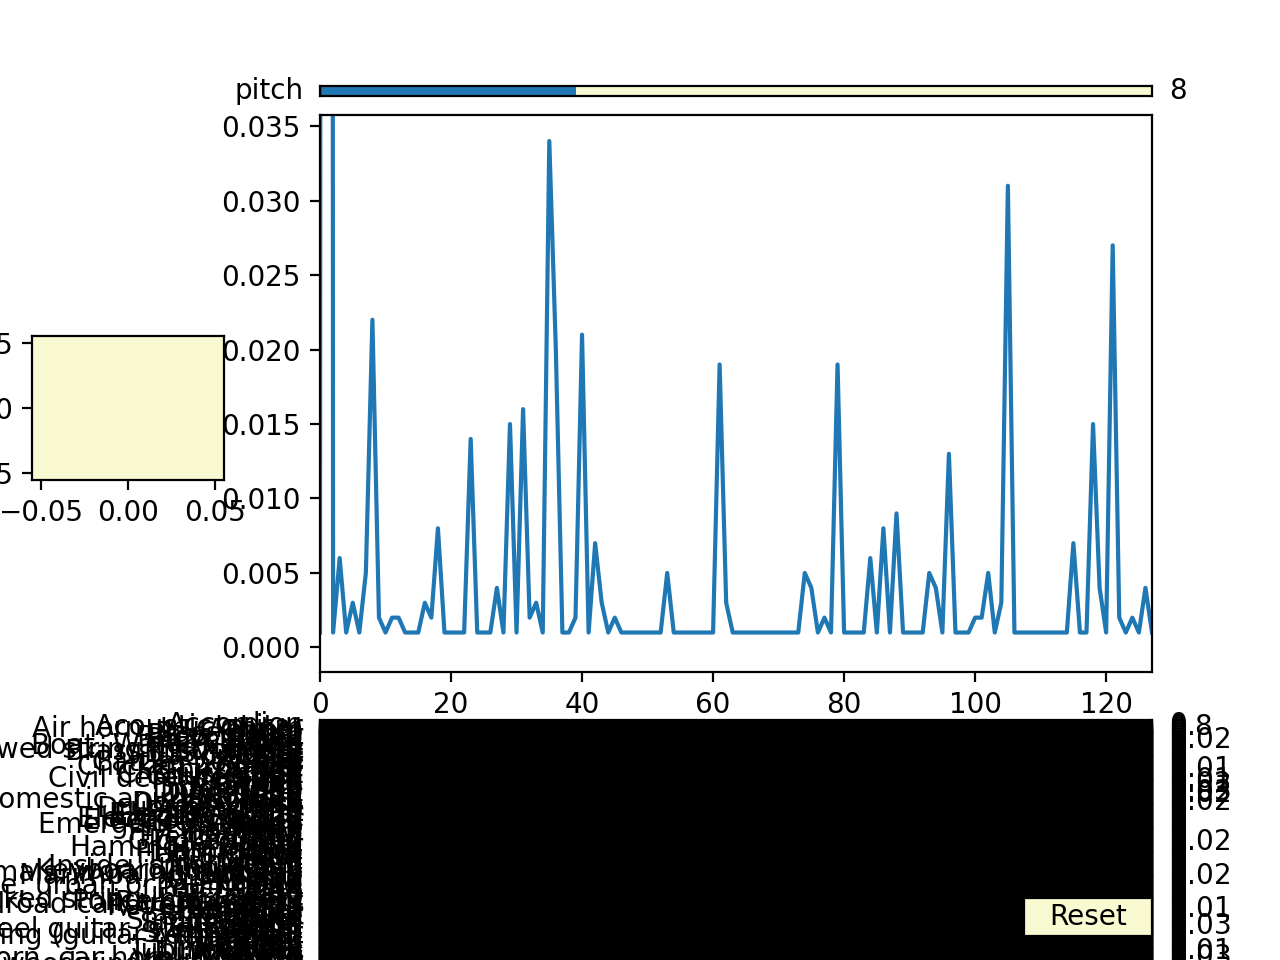

In [174]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

v0 = atts.cpu().numpy()

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.3)

t = range(len(att_dict['audioset']['values']))
s = v0[0, :len(att_dict['audioset']['values'])]
l, = plt.plot(t, s)

ax.margins(x=0)


axcolor = 'lightgoldenrodyellow'
sliders = {}
for i, v in enumerate(att_dict['audioset']['values']):
    ax1 = plt.axes([0.25, 0.24 - 0.002*i, 0.65, 0.01], facecolor=axcolor)
    slider = Slider(ax1, v, 0.001, 50, valinit=v0[0, i], valstep=0.001)
    sliders[v] = (ax1, slider)

axp = plt.axes([0.25, 0.9, 0.65, 0.01], facecolor=axcolor)
pslider = Slider(axp, 'pitch', 0.0, len(att_dict['pitch']['values']), valinit=0, valstep=1)

def update(val):
    input_t2[0, -len(att_dict['pitch']['values']):] = 0.0
    input_t2[0, int(-len(att_dict['pitch']['values']) + pslider.val)] = 1.0
    

    for i, v in enumerate(att_dict['audioset']['values']):
        v0[0, i] = sliders[v][1].val
    l.set_ydata(v0[0, :len(att_dict['audioset']['values'])])
    fig.canvas.draw_idle()


for v in att_dict['audioset']['values']:
    sliders[v][1].on_changed(update)
pslider.on_changed(update)
# slider01.on_changed(update)


resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')


def reset(event):
    for v in att_dict['audioset']['values']:
        sliders[v][1].reset()
button.on_clicked(reset)

rax = plt.axes([0.025, 0.5, 0.15, 0.15], facecolor=axcolor)
# radio = RadioButtons(rax, ('kick', 'snare', 'hat'), active=0)

plt.autoscale()
plt.show()


In [248]:
import torch
indim = model.ClassificationCriterion.getInputDim()


# input_t2[0, -indim:-indim+len(att_dict['audioset']['values'])] = torch.from_numpy(l.get_ydata())
input_t2[0, -indim:-indim+10] = 2

output = gnet(input_t2).detach().cpu()[0].numpy()
audio_out = loader.get_postprocessor()(resize(output))

print(input_t2[0, -15:-3])

Audio(audio_out, rate=16000, autoplay=True)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], device='cuda:0')


In [111]:
model.config.noiseVectorDim

64

In [116]:
model.ClassificationCriterion.keyOrder

['audioset', 'pitch']

In [115]:
64 + 80 + 26

170

In [114]:
input_t2.size()

torch.Size([1, 170])

In [118]:
170 -indim

64